In [1]:
!pip install pgmpy
!pip install networkx
!pip install daft

  Obtaining dependency information for daft from https://files.pythonhosted.org/packages/8c/bb/a9260db73c24cfb587c5d504c8fccacdbaae1bfb651386f605fd2cff30fa/daft-0.1.2-py3-none-any.whl.metadata


In [2]:
from pandas import read_csv
import pandas as pd
import numpy as np
from pgmpy.models import BayesianNetwork

df_orig = read_csv("healthcare-dataset-stroke-data.csv")
df_orig.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:


df_orig.shape



(5110, 12)

(array([255., 179., 154., 208., 229., 211., 228., 256., 231., 366., 301.,
        282., 344., 342., 296., 263., 210., 197., 185., 373.]),
 array([8.0000e-02, 4.1760e+00, 8.2720e+00, 1.2368e+01, 1.6464e+01,
        2.0560e+01, 2.4656e+01, 2.8752e+01, 3.2848e+01, 3.6944e+01,
        4.1040e+01, 4.5136e+01, 4.9232e+01, 5.3328e+01, 5.7424e+01,
        6.1520e+01, 6.5616e+01, 6.9712e+01, 7.3808e+01, 7.7904e+01,
        8.2000e+01]),
 <BarContainer object of 20 artists>)

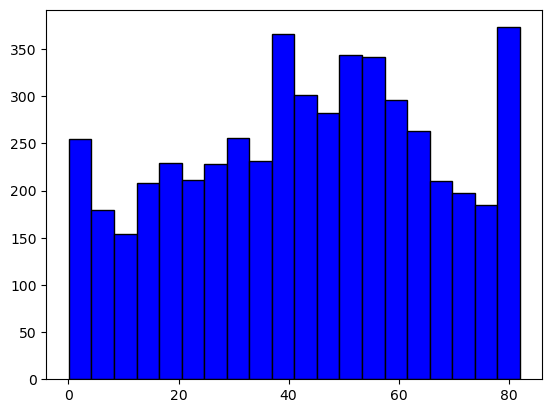

In [4]:
# age  distribution
import matplotlib.pyplot as plt
plt.hist(df_orig['age'], color = 'blue', edgecolor = 'black', bins = 20)

In [5]:
df=df_orig.drop(columns=['id'])
df.rename(
    columns=({ 'Residence_type': 'residence_type'}),
    inplace=True,
)

In [6]:
df['age']=pd.cut(x=df_orig['age'], bins=[np.min(df['age']),20,40,60,80, np.max(df['age'])],labels=["0-20","20-40","40-60","60-80","80+"])
df['age']

0       60-80
1       60-80
2       60-80
3       40-60
4       60-80
        ...  
5105    60-80
5106      80+
5107    20-40
5108    40-60
5109    40-60
Name: age, Length: 5110, dtype: category
Categories (5, object): ['0-20' < '20-40' < '40-60' < '60-80' < '80+']

In [7]:
df['bmi']=pd.cut(x=df_orig['bmi'], bins=[np.min(df['bmi']),18,25,40, np.max(df['bmi'])],labels=["low","normal","high", "vey high"])
df['bmi']

0         high
1          NaN
2         high
3         high
4       normal
         ...  
5105       NaN
5106      high
5107      high
5108      high
5109      high
Name: bmi, Length: 5110, dtype: category
Categories (4, object): ['low' < 'normal' < 'high' < 'vey high']

In [8]:
df['avg_glucose_level']=pd.cut(x=df_orig['avg_glucose_level'], bins=[np.min(df['avg_glucose_level']),80,140,np.max(df['avg_glucose_level'])],labels=["low","normal","high"])

In [9]:
# bayesian network 

<Axes: >

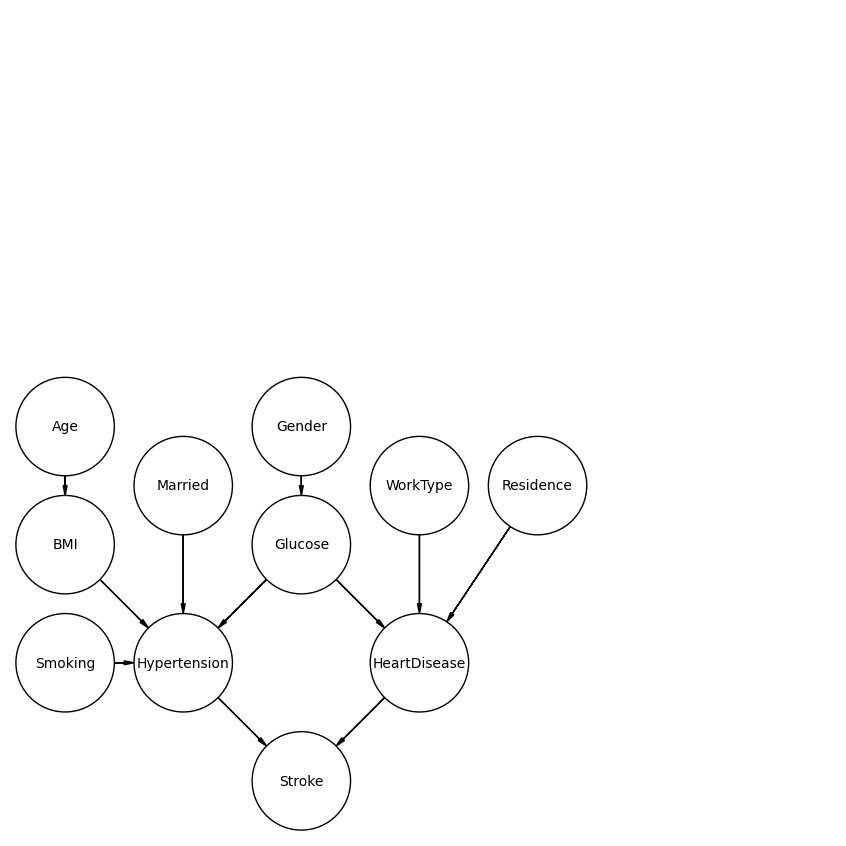

In [10]:
import daft
import matplotlib.pyplot as plt
from daft import PGM

pgm = PGM(shape=[14,14], node_unit=2.5, grid_unit=1.5)

pgm.add_node(daft.Node('Gender', r"Gender", 8, 7))
pgm.add_node(daft.Node('Age', r"Age", 4, 7))
pgm.add_node(daft.Node('Hypertension', r"Hypertension", 6, 3))
pgm.add_node(daft.Node('HeartDisease', r"HeartDisease", 10, 3))
pgm.add_node(daft.Node('Married', r"Married", 6, 6))
pgm.add_node(daft.Node('WorkType', r"WorkType", 10, 6))
pgm.add_node(daft.Node('Residence', r"Residence", 12, 6))
pgm.add_node(daft.Node('Glucose', r"Glucose", 8, 5))
pgm.add_node(daft.Node('BMI', r"BMI", 4, 5))
pgm.add_node(daft.Node('Smoking', r"Smoking", 4, 3))
pgm.add_node(daft.Node('Stroke', r"Stroke", 8, 1)
)
pgm.add_edge('Gender', 'Glucose')
pgm.add_edge('Age', 'BMI')
pgm.add_edge('Glucose', 'Hypertension')
pgm.add_edge('Smoking', 'Hypertension')
pgm.add_edge('BMI', 'Hypertension')
pgm.add_edge('Married', 'Hypertension')
pgm.add_edge('WorkType', 'HeartDisease')
pgm.add_edge('Residence', 'HeartDisease')
pgm.add_edge('Glucose', 'HeartDisease')
pgm.add_edge('Hypertension', 'Stroke')
pgm.add_edge('HeartDisease', 'Stroke')

pgm.render()

In [40]:
from pgmpy.models import BayesianModel

model = BayesianNetwork([('age', 'bmi'),
                       ('smoking_status', 'hypertension'),
                       ('ever_married', 'hypertension'),
                       ('gender', 'avg_glucose_level'),
                       ('work_type', 'heart_disease'),
                       ('residence_type', 'heart_disease'),
                       ('bmi', 'hypertension'),
                       ('avg_glucose_level', 'hypertension'),
                       ('avg_glucose_level', 'heart_disease'),
                       ('hypertension', 'stroke'),
                       ('heart_disease', 'stroke')])

In [41]:

model.nodes()

NodeView(('age', 'bmi', 'smoking_status', 'hypertension', 'ever_married', 'gender', 'avg_glucose_level', 'work_type', 'heart_disease', 'residence_type', 'stroke'))

In [42]:
model.edges()

OutEdgeView([('age', 'bmi'), ('bmi', 'hypertension'), ('smoking_status', 'hypertension'), ('hypertension', 'stroke'), ('ever_married', 'hypertension'), ('gender', 'avg_glucose_level'), ('avg_glucose_level', 'hypertension'), ('avg_glucose_level', 'heart_disease'), ('work_type', 'heart_disease'), ('heart_disease', 'stroke'), ('residence_type', 'heart_disease')])

In [43]:
model.local_independencies("hypertension")

(hypertension ⟂ age, work_type, gender, heart_disease, residence_type | avg_glucose_level, ever_married, bmi, smoking_status)

In [44]:
model.local_independencies("heart_disease")

(heart_disease ⟂ age, bmi, smoking_status, gender, ever_married, hypertension | avg_glucose_level, work_type, residence_type)

In [45]:
from pgmpy.estimators import BayesianEstimator

model.cpds = []
model.fit(data=df, estimator=BayesianEstimator, prior_type="BDeu")

for cpd in model.get_cpds():
    print(f'CPT - {cpd.variable}:')
    print(cpd, '\n')

CPT - age:
+------------+-----------+
| age(0-20)  | 0.203259  |
+------------+-----------+
| age(20-40) | 0.241141  |
+------------+-----------+
| age(40-60) | 0.307332  |
+------------+-----------+
| age(60-80) | 0.224644  |
+------------+-----------+
| age(80+)   | 0.0236253 |
+------------+-----------+ 

CPT - bmi:
+---------------+----------------------+-----+----------------------+---------------------+
| age           | age(0-20)            | ... | age(60-80)           | age(80+)            |
+---------------+----------------------+-----+----------------------+---------------------+
| bmi(high)     | 0.21467935871743488  | ... | 0.7554397098821396   | 0.6745689655172413  |
+---------------+----------------------+-----+----------------------+---------------------+
| bmi(low)      | 0.26077154308617234  | ... | 0.011106074342701723 | 0.01939655172413793 |
+---------------+----------------------+-----+----------------------+---------------------+
| bmi(normal)   | 0.50125250501002 

In [46]:
print(model.get_cpds(node="smoking_status"))

+---------------------------------+----------+
| smoking_status(Unknown)         | 0.30168  |
+---------------------------------+----------+
| smoking_status(formerly smoked) | 0.170723 |
+---------------------------------+----------+
| smoking_status(never smoked)    | 0.37724  |
+---------------------------------+----------+
| smoking_status(smokes)          | 0.150356 |
+---------------------------------+----------+


In [47]:
print(model.get_cpds(node="bmi"))

+---------------+----------------------+-----+----------------------+---------------------+
| age           | age(0-20)            | ... | age(60-80)           | age(80+)            |
+---------------+----------------------+-----+----------------------+---------------------+
| bmi(high)     | 0.21467935871743488  | ... | 0.7554397098821396   | 0.6745689655172413  |
+---------------+----------------------+-----+----------------------+---------------------+
| bmi(low)      | 0.26077154308617234  | ... | 0.011106074342701723 | 0.01939655172413793 |
+---------------+----------------------+-----+----------------------+---------------------+
| bmi(normal)   | 0.50125250501002     | ... | 0.17157751586582048  | 0.28663793103448276 |
+---------------+----------------------+-----+----------------------+---------------------+
| bmi(vey high) | 0.023296593186372744 | ... | 0.06187669990933817  | 0.01939655172413793 |
+---------------+----------------------+-----+----------------------+-----------

In [48]:
model.check_model()

True

In [49]:
model.get_cardinality()

defaultdict(int,
            {'age': 5,
             'bmi': 4,
             'smoking_status': 4,
             'hypertension': 2,
             'ever_married': 2,
             'gender': 3,
             'avg_glucose_level': 3,
             'work_type': 5,
             'heart_disease': 2,
             'residence_type': 2,
             'stroke': 2})

In [50]:
# variable elemination

In [51]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)

In [52]:
import warnings
warnings.filterwarnings("ignore")

print(infer.query(["hypertension"],evidence={"age": "80+"}))



+-----------------+---------------------+
| hypertension    |   phi(hypertension) |
+=================+=====================+
| hypertension(0) |              0.9128 |
+-----------------+---------------------+
| hypertension(1) |              0.0872 |
+-----------------+---------------------+


In [53]:
print(infer.query(["hypertension"],evidence={"age": "80+", "smoking_status" : 'smokes'}))

+-----------------+---------------------+
| hypertension    |   phi(hypertension) |
+=================+=====================+
| hypertension(0) |              0.8931 |
+-----------------+---------------------+
| hypertension(1) |              0.1069 |
+-----------------+---------------------+


In [54]:


print(infer.query(["hypertension"],evidence={"age": "60-80", "smoking_status" : 'smokes', "bmi" : "high"}))



+-----------------+---------------------+
| hypertension    |   phi(hypertension) |
+=================+=====================+
| hypertension(0) |              0.8847 |
+-----------------+---------------------+
| hypertension(1) |              0.1153 |
+-----------------+---------------------+


In [55]:
print(infer.query(["hypertension"],evidence={"age": "0-20", "smoking_status" : 'never smoked', "bmi" : "normal"}))

+-----------------+---------------------+
| hypertension    |   phi(hypertension) |
+=================+=====================+
| hypertension(0) |              0.9259 |
+-----------------+---------------------+
| hypertension(1) |              0.0741 |
+-----------------+---------------------+


In [56]:
print(infer.query(["stroke"],evidence={"heart_disease": 1}))

+-----------+---------------+
| stroke    |   phi(stroke) |
+===========+===============+
| stroke(0) |        0.8366 |
+-----------+---------------+
| stroke(1) |        0.1634 |
+-----------+---------------+


In [57]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,60-80,0,1,Yes,Private,Urban,high,high,formerly smoked,1
2,Male,60-80,0,1,Yes,Private,Rural,normal,high,never smoked,1
3,Female,40-60,0,0,Yes,Private,Urban,high,high,smokes,1
4,Female,60-80,1,0,Yes,Self-employed,Rural,high,normal,never smoked,1
5,Male,80+,0,0,Yes,Private,Urban,high,high,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,0-20,0,0,No,children,Rural,normal,normal,Unknown,0
5106,Female,80+,0,0,Yes,Self-employed,Urban,normal,high,never smoked,0
5107,Female,20-40,0,0,Yes,Self-employed,Rural,normal,high,never smoked,0
5108,Male,40-60,0,0,Yes,Private,Rural,high,high,formerly smoked,0


In [58]:
print(infer.query(["stroke"],evidence={"heart_disease": 1  , "gender" : "Male" , "age" : "60-80"}))

+-----------+---------------+
| stroke    |   phi(stroke) |
+===========+===============+
| stroke(0) |        0.8364 |
+-----------+---------------+
| stroke(1) |        0.1636 |
+-----------+---------------+


In [59]:
df.dropna(inplace = True)

In [60]:
import pandas as pd
from sklearn.metrics import accuracy_score

accuracies = []

for _, row in df.iterrows():
  
    evidence = {col: row[col] for col in df.columns if col != "stroke"}

    query_result = infer.query(["stroke"], evidence=evidence)

    prob_stroke = query_result.values[1]  
    predicted_stroke = 1 if prob_stroke > 0.5 else 0

    ground_truth_stroke = row["stroke"]

    accuracy = accuracy_score([ground_truth_stroke], [predicted_stroke])
    accuracies.append(accuracy)

overall_accuracy = sum(accuracies) / len(accuracies)
print(f"Overall Accuracy: {overall_accuracy}")


Overall Accuracy: 0.9573904179408766
